In [3]:
# pip install ndjson

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
with open('../../Datasets/amazon-video-games/Video_Games.json') as f:
    data = ndjson.load(f)

In [11]:
df = pd.DataFrame(data)

In [12]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [13]:
df.shape

(2565349, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  style           object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 217.7+ MB


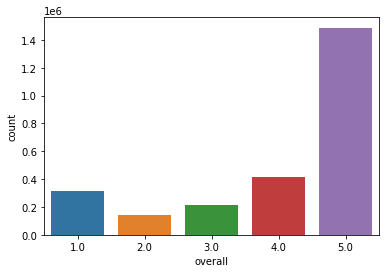

In [16]:
sns.countplot(data = df, x = 'overall');

In [17]:
len(df['asin'].value_counts(dropna=False))

71982

Random Sample of reviews

In [26]:
one_sample = df[df['overall'] == 1.0].sample(n=20000)
two_sample = df[df['overall'] == 2.0].sample(n=10000)
three_sample = df[df['overall'] == 3.0].sample(n=10000)
four_sample = df[df['overall'] == 4.0].sample(n=10000)
five_sample = df[df['overall'] == 5.0].sample(n=20000)

In [27]:
one_sample.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
2507245,1.0,True,"12 25, 2015",ABKWZO2J7RB5C,B00X6ZUZME,Jon.M.Barter,Weak sauce accessory. Had to hold down button...,There sare definitely better options out there,1451001600,NaN,NaN,NaN
1981589,1.0,True,"08 8, 2016",A1BQU8JLXS6OOX,B015YE7SM4,Richy Fukushima,"I got this mouse on sale. It looks nice, has ...","nice product, but it freezes randomly",1470614400,NaN,NaN,NaN
2318395,1.0,False,"02 17, 2011",A2Z6E2JHMTJJR4,B001CD8L1Y,Heez,I bought this product from a different website...,Piece of junk.,1297900800,NaN,NaN,NaN
1248508,1.0,True,"01 4, 2018",A2Y3RL6NN4CI9D,B00CAUTK0E,Mason Rickert,Way overpriced. Hurt with a headset on. And wa...,"Overpriced, save your money and find a better,...",1515024000,2,"{'Color:': ' Onyx', 'Style:': ' Standard Packa...",NaN
717421,1.0,False,"09 17, 2010",A25HX4LNZLJNWD,B002BS47TE,mazinger4,"I purchased this game over a month ago, and ev...",Boss difficulty is unbeatable,1284681600,4,{'Format:': ' Video Game'},NaN


In [28]:
one_sample.shape

(20000, 12)

In [29]:
sample_df = pd.concat([one_sample, two_sample, three_sample, four_sample, five_sample], axis=0)

In [30]:
sample_df['overall'].value_counts(dropna=False)

1.0    20000
5.0    20000
2.0    10000
3.0    10000
4.0    10000
Name: overall, dtype: int64

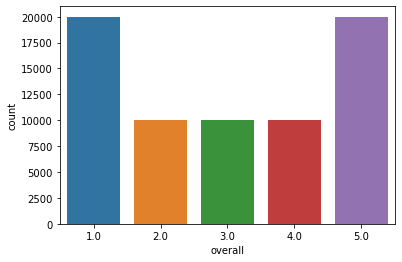

In [31]:
sns.countplot(data=sample_df, x='overall');

In [32]:
sample_reviews = df.sample(n=200000, random_state=20)

In [33]:
sample_df.to_csv('small_corpus.csv', index=False)

In [34]:
sample_reviews.to_csv('big_corpus.csv', index=False)